# Support vector regression


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import json

In [43]:
df = pd.read_excel("housing_data.xlsx",)
df.head()

X = df[["LSTAT"]].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [44]:
# Standardization (Recommended for multiple columns regression)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [45]:
svr = SVR(C=1, epsilon=1)

In [46]:
svr.fit(X_train_std, y_train)
y_train_pred = svr.predict(X_train_std)
y_test_pred = svr.predict(X_test_std)

In [47]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

data = {
    "MSE Train": [MSE_train],
    "MSE Test": [MSE_test],
    "R2 Train": [R2_train],
    "R2 Test": [R2_test],
}
dft = pd.DataFrame(data=data)
display(dft)

,MSE Train,MSE Test,R2 Train,R2 Test
0,33.486564,36.649561,0.604946,0.559847


Text(0.5, 1.0, 'Train')

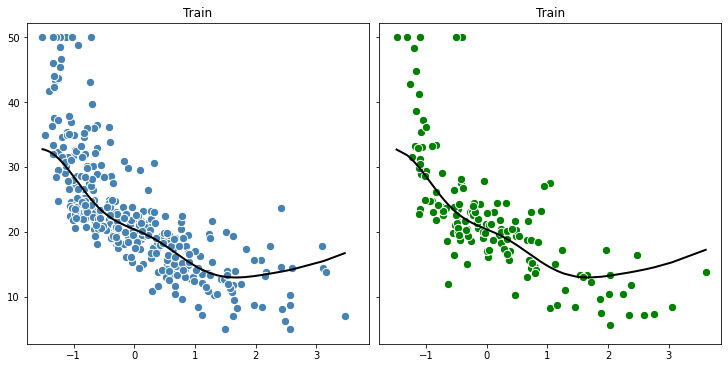

In [48]:
# Plotting

# Indices for sorting during plotting
idx_train = np.argsort(X_train_std, axis=0).ravel()
idx_test = np.argsort(X_test_std, axis=0).ravel()

# Plot regression curve
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True)
axs[0].scatter(X_train_std, y_train, c="steelblue", edgecolor="white", s=70)
axs[0].plot(X_train_std[idx_train,:1], y_train_pred[idx_train], color="black", lw=2)
axs[0].set_title("Train")

axs[1].scatter(X_test_std, y_test, c="green", edgecolor="white", s=70)
axs[1].plot(X_test_std[idx_test,:1], y_test_pred[idx_test], color="black", lw=2)
axs[1].set_title("Train")

Text(0.5, 1.0, 'Test')

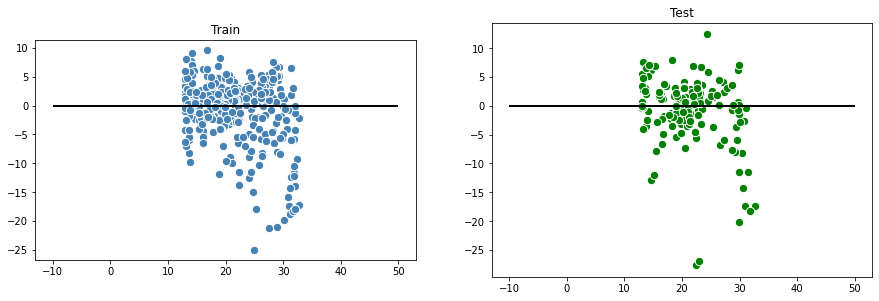

In [49]:
# Plot residual
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
ax1.scatter(y_train_pred, y_train_pred - y_train, c="steelblue", marker="o", edgecolor="white", s=70)
ax1.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
ax1.axes.set_aspect("equal")
ax1.set_title('Train')

ax2.scatter(y_test_pred, y_test_pred - y_test, c="green", marker="o", edgecolor="white", s=70)
ax2.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
ax2.axes.set_aspect("equal")
ax2.set_title('Test')